# Proyek Analisis Data: Bike Sharing
- Nama: Chandra Arifin
- Email: chandra.arifin82@gmail.com
- Id Dicoding: chandra_arifin

## Menentukan Pertanyaan Bisnis

- pertanyaan 1 : Bagaimana Perbandingan Pengguna/Bike Hiring Registered dan Casual dari tahun ke tahun?
- pertanyaan 2 : Pada Season apa pengguna/penyewa Bike / Sepeda terbanyak?

## Menyiapkan semua library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("data\data_1.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("data\data_2.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Assessing Data

#### Menilai Tabel Day

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
#tidak ada missing value
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
#tidak ada duplikasi
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai Tabel Hour

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
#tidak ada missing value
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Cleaning Data

#### Membersihkan Tabel "Day"

##### Inaccurate Value

In [11]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [12]:
day_df["yr"] = pd.DatetimeIndex(day_df["dteday"]).year

In [13]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,2011.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,2011.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,2011.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,2012.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,2012.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,2012.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


##### Memperbaiki Tipe Data

In [14]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
day_df["holiday"] = day_df["holiday"].astype("bool")
day_df["workingday"] = day_df["workingday"].astype("bool")

In [15]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int32         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    bool          
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    bool          
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: bool(2), datetime64[ns]

In [16]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,2011,1,False,6,False,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,2011,1,False,0,False,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,2011,1,False,1,True,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,2011,1,False,2,True,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,2011,1,False,3,True,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Membersihkan Tabel "Hour"

##### Inaccurate Value

In [17]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [18]:
hour_df["yr"] = pd.DatetimeIndex(hour_df["dteday"]).year

In [19]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,2011.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,2011.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,2011.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,2012.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,2012.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,2012.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


##### Memperbaiki Tipe Data

In [20]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
hour_df["holiday"] = hour_df["holiday"].astype("bool")
hour_df["workingday"] = hour_df["workingday"].astype("bool")

In [21]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int32         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  bool          
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  bool          
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [22]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,2011,1,0,False,6,False,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,2011,1,1,False,6,False,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,2011,1,2,False,6,False,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,2011,1,3,False,6,False,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,2011,1,4,False,6,False,1,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore day_df

In [23]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
322,323,2011-11-19,4,2011,11,False,6,False,1,0.329167,0.324483,0.502083,0.224496,943,2720,3663
17,18,2011-01-18,1,2011,1,False,2,True,2,0.216667,0.232333,0.861667,0.146775,9,674,683
401,402,2012-02-06,1,2012,2,False,1,True,1,0.282609,0.296426,0.622174,0.153800,206,3578,3784
723,724,2012-12-24,1,2012,12,False,1,True,2,0.231304,0.258900,0.791304,0.077230,174,746,920
667,668,2012-10-29,4,2012,10,False,1,True,3,0.440000,0.439400,0.880000,0.358200,2,20,22


In [24]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,False,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,710,NaN,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,2.496580,2011.500684,6.519836,NaN,2.997264,NaN,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,2011.000000,1.000000,NaN,0.000000,NaN,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,2011.000000,4.000000,NaN,1.000000,NaN,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,2012.000000,7.000000,NaN,3.000000,NaN,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,2012.000000,10.000000,NaN,5.000000,NaN,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,2012.000000,12.000000,NaN,6.000000,NaN,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [25]:
day_df.instant.is_unique

True

In [26]:
day_df.instant.duplicated

<bound method Series.duplicated of 0        1
1        2
2        3
3        4
4        5
      ... 
726    727
727    728
728    729
729    730
730    731
Name: instant, Length: 731, dtype: int64>

In [27]:
day_df.groupby(by="yr").agg({
    "instant": "nunique",
    "registered": ["sum", "min", "max"],
    "casual":  ["sum", "min", "max"]
})

instant registered             casual          
     nunique        sum  min   max     sum min   max
yr                                                  
2011     365     995851  416  4614  247252   9  3065
2012     366    1676811   20  6946  372765   2  3410

In [28]:
day_df.groupby([day_df.yr.rename("Tahun"), day_df.mnth.rename("Bulan")]).agg({
    "instant": "nunique",
    "registered": ["sum", "min", "max"],
    "casual":  ["sum", "min", "max"]
})

instant registered             casual           
            nunique        sum   min   max    sum  min   max
Tahun Bulan                                                 
2011  1          31      35116   416  1844   3073    9   331
      2          28      41973   905  2348   6242   47   694
      3          31      51219   491  2355  12826   46  1424
      4          30      72524   674  3722  22346  121  1965
      5          31     104771  2213  4238  31050  255  2355
      6          30     112900  2993  4488  30612  513  1920
      7          31     104889  2298  4220  36452  562  3065
      8          31     107849   889  4614  28842  226  1914
      9          30     100873  1689  4372  26545  118  2521
      10         31      98289   570  4267  25222   57  2397
      11         30      86573   935  3891  15594   69  1275
      12         31      78875   451  3672   8448   50   706
2012  1          31      87775  1234  4185   8969   67  1070
      2          29      94416  1456  4546   8721   65  1435
      3          31     133257  2339  5893  31618  203  3155
      4          30     135768   907  5950  38456  120  3252
      5          31     151630  2501  6433  44235  342  3410
      6          30     159536  3594  6456  43294  477  2963
      7          31     161902  3195  6790  41705  747  2562
      8          31     171306  3341  6541  43197  935  2827
      9          30     174795  3197  6946  43778  371  3160
      10         31     164303    20  6911  34538    2  3031
      11         30     131655  1470  5520  21009  123  2290
      12         31     110468   432  6055  13245    9  1153

In [29]:
#1:springer, 2:summer, 3:fall, 4:winter

season_in_day_df =  day_df.season
day_df["season_name"] = day_df["season"].apply(lambda x: "Springer" if x == 1 else ("Summer" if x == 2 else ("Fall" if x == 3 else "Winter")))
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_name
673,674,2012-11-04,4,2012,11,False,0,False,1,0.325833,0.329538,0.532917,0.179108,1201,3906,5107,Winter
331,332,2011-11-28,4,2011,11,False,1,True,1,0.503478,0.490122,0.743043,0.142122,253,3614,3867,Winter
562,563,2012-07-16,3,2012,7,False,1,True,1,0.763333,0.724125,0.645000,0.164187,1088,5742,6830,Fall
402,403,2012-02-07,1,2012,2,False,2,True,1,0.354167,0.361104,0.496250,0.147379,199,4176,4375,Springer
9,10,2011-01-10,1,2011,1,False,1,True,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321,Springer


In [30]:
#	+ weathersit : 
#		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

weathersit_in_day_df =  day_df.weathersit
day_df["weathersit_name"] = day_df["weathersit"].apply(lambda x: "Clear, Few clouds, Partly cloudy, Partly cloudy" if x == 1 
                                                       else ("Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist" if x == 2 else 
                                                             ("Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds" if x == 3 else 
                                                              "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog")))
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_name,weathersit_name
571,572,2012-07-25,3,2012,7,False,3,True,1,0.724167,0.654054,0.450000,0.164800,1383,6790,8173,Fall,"Clear, Few clouds, Partly cloudy, Partly cloudy"
290,291,2011-10-18,4,2011,10,False,2,True,2,0.532500,0.522721,0.701667,0.110087,637,4111,4748,Winter,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe..."
79,80,2011-03-21,2,2011,3,False,1,True,2,0.430435,0.409735,0.737391,0.288783,401,1676,2077,Summer,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe..."
98,99,2011-04-09,2,2011,4,False,6,False,2,0.342500,0.341529,0.877500,0.133083,879,1576,2455,Summer,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe..."
409,410,2012-02-14,1,2012,2,False,2,True,2,0.319167,0.333946,0.508750,0.141179,135,3787,3922,Springer,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe..."


In [31]:
day_df.groupby(by="season_name").agg({
    "instant": "nunique",
    "registered": ["sum", "min", "max"],
    "casual":  ["sum", "min", "max"]
})

instant registered             casual           
            nunique        sum  min   max     sum  min   max
season_name                                                 
Fall            188     835038  889  6917  226091  118  3160
Springer        181     410726  416  5315   60622    9  3155
Summer          184     715067  674  6456  203522  120  3410
Winter          178     711831   20  6946  129782    2  3031

In [32]:
day_df.groupby(by="weathersit_name").agg({
    "instant": "nunique",
    "registered": ["sum", "min", "max"],
    "casual":  ["sum", "min", "max"]
})

instant registered       \
                                                   nunique        sum  min   
weathersit_name                                                              
Clear, Few clouds, Partly cloudy, Partly cloudy        463    1811606  416   
Light Snow, Light Rain + Thunderstorm + Scatter...      21      33974   20   
Mist + Cloudy, Mist + Broken clouds, Mist + Few...     247     827082  491   

                                                          casual            
                                                     max     sum min   max  
weathersit_name                                                             
Clear, Few clouds, Partly cloudy, Partly cloudy     6946  446346  15  3410  
Light Snow, Light Rain + Thunderstorm + Scatter...  4324    3895   2  1264  
Mist + Cloudy, Mist + Broken clouds, Mist + Few...  6844  169776   9  3155

### Explore hour_df

In [33]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
9685,9686,2012-02-13,1,2012,2,12,False,1,True,1,0.28,0.2576,0.28,0.3284,7,111,118
15304,15305,2012-10-04,4,2012,10,21,False,4,True,1,0.62,0.6061,0.69,0.0000,33,288,321
14066,14067,2012-08-14,3,2012,8,7,False,2,True,2,0.66,0.6061,0.83,0.0896,1,178,179
14666,14667,2012-09-08,3,2012,9,7,False,6,False,1,0.66,0.5909,0.89,0.2836,11,71,82
10009,10010,2012-02-27,1,2012,2,2,False,1,True,1,0.26,0.2273,0.70,0.2985,0,4,4


In [34]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,16879,NaN,11865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,2011.502561,6.537775,11.546752,NaN,3.003683,NaN,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,2011.000000,1.000000,0.000000,NaN,0.000000,NaN,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,2011.000000,4.000000,6.000000,NaN,1.000000,NaN,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,2012.000000,7.000000,12.000000,NaN,3.000000,NaN,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,2012.000000,10.000000,18.000000,NaN,5.000000,NaN,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,2012.000000,12.000000,23.000000,NaN,6.000000,NaN,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [35]:
hour_df.instant.is_unique

True

In [36]:
hour_df.instant.duplicated

<bound method Series.duplicated of 0            1
1            2
2            3
3            4
4            5
         ...  
17374    17375
17375    17376
17376    17377
17377    17378
17378    17379
Name: instant, Length: 17379, dtype: int64>

In [37]:
hour_df.groupby(by="hr").agg({
    "instant": "nunique",
    "registered": "sum",
    "casual":  "sum"
})

,instant,registered,casual
hr,,,
0,726,31755,7375
1,724,19455,4709
2,715,12940,3412
3,697,6281,1893
4,697,3554,874
5,717,13249,1012
6,725,52115,3017
7,727,146134,8037
8,727,245240,15761


In [38]:
hour_df.groupby(by="hr").instant.nunique().sort_values(ascending=False)

hr
17    730
16    730
13    729
15    729
14    729
12    728
22    728
21    728
20    728
19    728
18    728
23    728
11    727
10    727
9     727
8     727
7     727
0     726
6     725
1     724
5     717
2     715
4     697
3     697
Name: instant, dtype: int64

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Perbandingan Pengguna/Bike Hiring Registered dan Casual dari tahun ke tahun?


In [39]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_name,weathersit_name
260,261,2011-09-18,3,2011,9,False,0,False,1,0.507500,0.490537,0.695000,0.178483,1353,2921,4274,Fall,"Clear, Few clouds, Partly cloudy, Partly cloudy"
611,612,2012-09-03,3,2012,9,True,1,False,1,0.707500,0.661629,0.790833,0.151121,1965,4069,6034,Fall,"Clear, Few clouds, Partly cloudy, Partly cloudy"
569,570,2012-07-23,3,2012,7,False,1,True,1,0.741667,0.690017,0.694167,0.138683,1135,5831,6966,Fall,"Clear, Few clouds, Partly cloudy, Partly cloudy"
82,83,2011-03-24,2,2011,3,False,4,True,2,0.285000,0.270833,0.805833,0.243787,166,1699,1865,Summer,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe..."
420,421,2012-02-25,1,2012,2,False,6,False,1,0.290833,0.255675,0.395833,0.421642,317,2415,2732,Springer,"Clear, Few clouds, Partly cloudy, Partly cloudy"


In [40]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   instant          731 non-null    int64         
 1   dteday           731 non-null    datetime64[ns]
 2   season           731 non-null    int64         
 3   yr               731 non-null    int32         
 4   mnth             731 non-null    int64         
 5   holiday          731 non-null    bool          
 6   weekday          731 non-null    int64         
 7   workingday       731 non-null    bool          
 8   weathersit       731 non-null    int64         
 9   temp             731 non-null    float64       
 10  atemp            731 non-null    float64       
 11  hum              731 non-null    float64       
 12  windspeed        731 non-null    float64       
 13  casual           731 non-null    int64         
 14  registered       731 non-null    int64    

In [41]:
hire_tahun_registered_df = day_df.groupby("yr").registered.sum().sort_values(ascending=False).reset_index()
hire_tahun_registered_df.head()

,yr,registered
0,2012,1676811
1,2011,995851


In [42]:
hire_tahun_casual_df = day_df.groupby("yr").casual.sum().sort_values(ascending=False).reset_index()
hire_tahun_casual_df.head()

,yr,casual
0,2012,372765
1,2011,247252


C:\Users\INTEL MSI\.virtualenvs\Analisis_Data-kRauugiB\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\INTEL MSI\.virtualenvs\Analisis_Data-kRauugiB\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\INTEL MSI\.virtualenvs\Analisis_Data-kRauugiB\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\INTEL MSI\.virtualenvs\Analisis_Data-kRauugiB\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

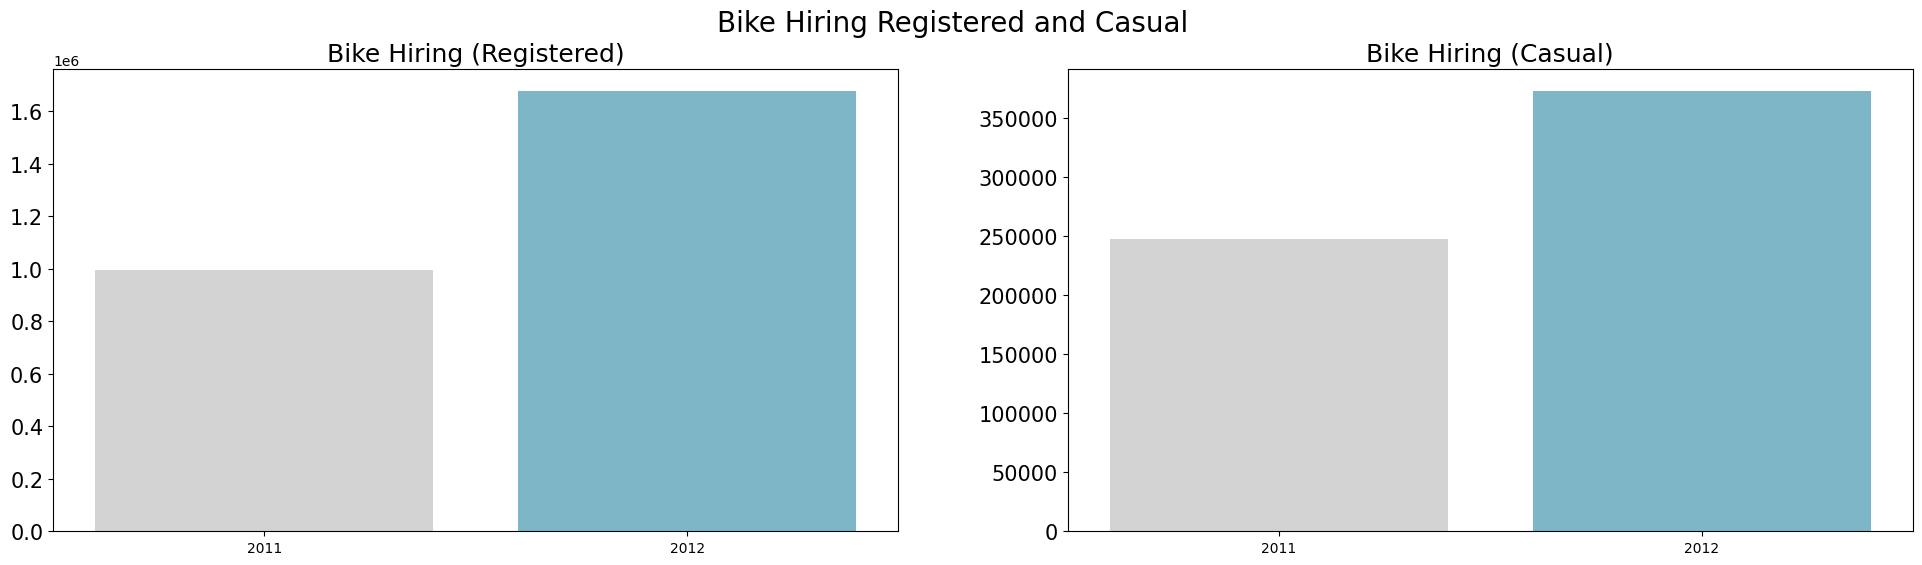

In [43]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#D3D3D3", "#72BCD4"]

sns.barplot(x="yr", y="registered", data=hire_tahun_registered_df.head(), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Bike Hiring (Registered)", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="yr", y="casual", data=hire_tahun_casual_df.head(), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
#ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
#ax[1].yaxis.tick_right()
ax[1].set_title("Bike Hiring (Casual)", loc="center", fontsize=18)
ax[1].tick_params(axis ='y', labelsize=15)

plt.suptitle("Bike Hiring Registered and Casual", fontsize=20)
plt.show()

### Pertanyaan 2: Pada Season apa pengguna/penyewa Bike / Sepeda terbanyak?

In [44]:
hire_tahun_season_df = day_df.groupby("season_name").cnt.sum().sort_values(ascending=False).reset_index()

hire_tahun_season_df.head()

,season_name,cnt
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Springer,471348


C:\Users\INTEL MSI\.virtualenvs\Analisis_Data-kRauugiB\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\INTEL MSI\.virtualenvs\Analisis_Data-kRauugiB\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\INTEL MSI\.virtualenvs\Analisis_Data-kRauugiB\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


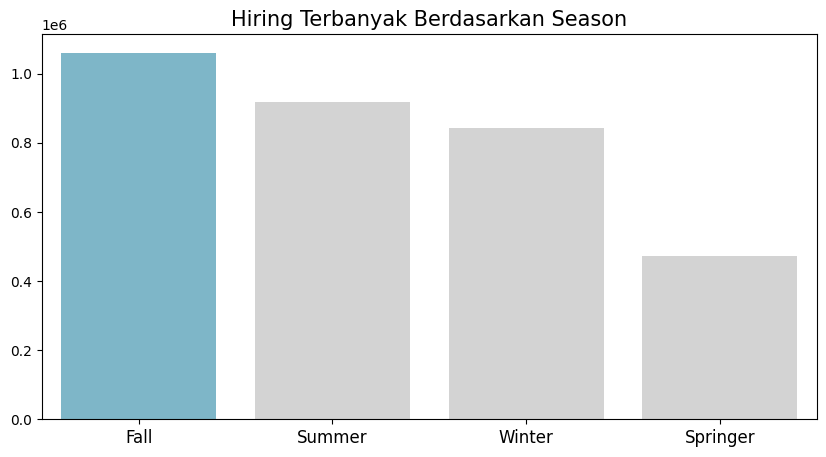

In [45]:
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

plt.figure(figsize=(10, 5))

sns.barplot(
    y="cnt", 
    x="season_name",
    data=hire_tahun_season_df.sort_values(by="cnt", ascending=False),
    palette=colors
)
plt.title("Hiring Terbanyak Berdasarkan Season", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

In [46]:
day_df.to_csv("main_data.csv", index=False)

### RFM Analysis

dikarenakan saya tidak paham bagaimana menereapkan RFM dalam study kasus ini, maka saya tidak membuatnya.
Recency : karena tidak tertera siapa penyewa, jadi tidak tahu bagaimana recency (kasus terakhir penyewa) sepeda
Frequency : didalam dataset ini tidak tertera siapa penyewa, jadi tidak ada info lebih lanjut siapa yg sering sewa.
Monetary : didalam dataset ini tidak tertera uang, hanya tertera banyaknya user register / casual

harap beri pencerahan kesaya bagaimana menerapkan RFM ini. di kolom apa. apakah instant bisa dijadikan key nya?


## Conclusion

- Conclution pertanyaan 1:
  Bike Hiring dari tahun 2011 ke 2012 mengalami kemajuan pesat, pengguna sepeda "Registered" lebih banyak dibandingkan
  dengan pengguna sepeda "casual".
  
- conclution pertanyaan 2
  Penyewa Sepada pada season "Fall" adalah yang terbanyak, dan season "Springer" paling sedikit.